In [121]:
import requests
import pandas as pd
import json
import re
import glob
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm

In [2]:
data_path = glob.glob("melon_data/*.json")

In [3]:
data_path

['melon_data/test.json',
 'melon_data/train.json',
 'melon_data/song_meta.json',
 'melon_data/genre_gn_all.json',
 'melon_data/val.json']

In [136]:
df_train = pd.read_json("melon_data/train.json")
df_val = pd.read_json("melon_data/val.json")
df_test = pd.read_json("melon_data/test.json")
df_meta = pd.read_json("melon_data/song_meta.json")
## df_genre = pd.read_json("melon_data/genre_gn_all.json")

In [5]:
df_train.shape

(115071, 6)

In [6]:
df_test.shape

(10740, 6)

In [7]:
df_val.shape

(23015, 6)

In [8]:
df_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [9]:
df_meta.columns

Index(['song_gn_dtl_gnr_basket', 'issue_date', 'album_name', 'album_id',
       'artist_id_basket', 'song_name', 'song_gn_gnr_basket',
       'artist_name_basket', 'id'],
      dtype='object')

In [10]:
df_test.columns

Index(['tags', 'id', 'plylst_title', 'songs', 'like_cnt', 'updt_date'], dtype='object')

In [11]:
df_test = pd.read_json("melon_data/test.json")

In [12]:
df_test

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000
...,...,...,...,...,...,...
10735,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000
10736,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000
10737,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000
10738,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000


In [13]:
df_test.sort_values(by='like_cnt',ascending=False)

,tags,id,plylst_title,songs,like_cnt,updt_date
3973,"[감성힙합, 랩, 한국힙합]",139284,,"[338851, 261632, 688022, 567811, 607465, 36683...",36075,2020-04-20 13:43:03.000
6803,[],135548,,"[514673, 298579, 573694, 479422, 169894, 33485...",32270,2011-10-04 00:56:54.000
6126,"[봄바람, 드라이브, 기분전환, 설렘]",131039,,"[84356, 584840, 674886, 522350, 659573, 13030,...",9748,2020-03-01 06:00:26.000
5841,[],91321,,"[237407, 267044, 658806, 686323, 535483, 16649...",9410,2020-04-15 19:09:29.000
6076,[],151650,,"[673869, 700562, 579003, 434871, 260287, 34879...",8999,2020-04-20 06:00:25.000
...,...,...,...,...,...,...
4390,[힙합],1780,,"[311834, 672876, 508131, 370044, 635021, 37461...",0,2013-05-27 12:21:33.000
675,[],22687,,"[151978, 278872, 283632]",0,2016-11-03 21:35:11.000
4391,"[잔잔한, 감성, 밤, 겨울밤]",71122,,"[19533, 241136, 357489, 295250, 151183, 542554...",0,2018-02-20 08:04:45.000
2850,[],45424,,"[285023, 505515, 444796, 621092, 76538, 162762...",0,2015-08-19 16:59:38.000


In [97]:
df_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [15]:
df_meta['song_name']

0                                                  Feelings
1         Bach : Partita No. 4 In D Major, BWV 828 - II....
2                           Solsbury Hill (Remastered 2002)
3         Feeling Right (Everything Is Nice) (Feat. Popc...
4                                                   그남자 그여자
                                ...                        
707984                             Coffin For Head Of State
707985                                      Change Of Heart
707986                                               스치듯 안녕
707987                                                 숲의 빛
707988                                         Queen 명곡 멜로디
Name: song_name, Length: 707989, dtype: object

In [16]:
df_train.sort_values('like_cnt',ascending=False) ## inplace = True 하면 df_train 자체가 정렬된 것으로 저장됨.

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...",72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,"[힐링, 휴식, 기분전환]",113501,감성이 터지는 팝음악들,"[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000
...,...,...,...,...,...,...
104613,[어쿠스틱기타],132666,어쿠스틱 좋은 노래,"[110540, 688028, 624009, 593300, 494305, 65325...",0,2018-04-24 19:10:01.000
71156,[락],9179,라디오 797,"[27673, 112731, 550192, 647261, 509152, 314370...",0,2010-11-09 13:28:23.000
16539,"[잔잔한, 힐링, 명상, 피아노, 차분함]",42577,따스한 감성을 전하는 피아노 음악,"[274395, 95894, 201745, 191637, 602182, 200150...",0,2019-05-03 10:14:33.000
71151,"[댄스, 댄스곡, 신나는]",61003,내적댄스 대박! 쉰나는 댄스곡,"[690285, 580860, 455945, 114387, 498452, 34758...",0,2019-12-21 00:09:24.000


In [17]:
like = df_train['like_cnt']==53211

In [18]:
most_like = df_train[like]

In [19]:
most_like

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000


In [20]:
a = []
for i in most_like['songs']:
    a.extend(i)

In [23]:
a

[159317,
 368264,
 600999,
 274905,
 643023,
 240703,
 452196,
 424328,
 380410,
 280877,
 248200,
 204192,
 260161,
 248316,
 520177,
 388089,
 409625,
 274719,
 570357,
 258956,
 342116,
 587463,
 438327,
 25767,
 481009,
 529425,
 621033,
 518481,
 96298,
 382435,
 649213,
 212859,
 37254,
 526953,
 502224,
 585597,
 144941,
 463850,
 217952,
 285826,
 431974,
 488837,
 208068,
 336281,
 238669,
 94648,
 601447,
 34552,
 384449,
 74430,
 434095,
 661211,
 386808,
 313326,
 191130,
 443160,
 660095,
 613158,
 406621,
 674508,
 620511,
 474340,
 229518,
 46763,
 171234,
 247927,
 1226,
 330380,
 659629,
 37876,
 346225,
 530198,
 650049,
 135694,
 65980,
 660988,
 27563,
 193194,
 423564,
 152861,
 168835,
 216327,
 658205,
 381217,
 272203,
 376518,
 62438,
 695548,
 139352,
 243860,
 699594,
 50766,
 308082,
 695353,
 675366,
 672813,
 124214,
 565131,
 627457,
 228643]

In [22]:
a[0]

159317

In [38]:
# df_test.columns
# df_train.columns
# df_meta.columns
# df_val.columns

Index(['tags', 'id', 'plylst_title', 'songs', 'like_cnt', 'updt_date'], dtype='object')

In [41]:
df_train.sort_values('like_cnt', ascending=False) 
## 정렬해서 좋아요가 가장 많은 플레이리스트 검색 --> playlist_id = 74220

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...",72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,"[힐링, 휴식, 기분전환]",113501,감성이 터지는 팝음악들,"[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000
...,...,...,...,...,...,...
104613,[어쿠스틱기타],132666,어쿠스틱 좋은 노래,"[110540, 688028, 624009, 593300, 494305, 65325...",0,2018-04-24 19:10:01.000
71156,[락],9179,라디오 797,"[27673, 112731, 550192, 647261, 509152, 314370...",0,2010-11-09 13:28:23.000
16539,"[잔잔한, 힐링, 명상, 피아노, 차분함]",42577,따스한 감성을 전하는 피아노 음악,"[274395, 95894, 201745, 191637, 602182, 200150...",0,2019-05-03 10:14:33.000
71151,"[댄스, 댄스곡, 신나는]",61003,내적댄스 대박! 쉰나는 댄스곡,"[690285, 580860, 455945, 114387, 498452, 34758...",0,2019-12-21 00:09:24.000


In [46]:
most_like_playlist = df_train['id'] == 74220

In [49]:
df_train[most_like_playlist]

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000


In [50]:
df_train[most_like_playlist].songs

46524    [159317, 368264, 600999, 274905, 643023, 24070...
Name: songs, dtype: object

In [58]:
for i in df_train[most_like_playlist].songs:
    print(df_meta['song_name'][i])

159317                              Confidant
368264               How To Love (feat. GRAY)
600999                           Say It Again
274905    Another Life (Feat. Destiny Rogers)
643023                               6 months
                         ...                 
672813                      Everytime (Cover)
124214                       i think too much
565131           Details (feat. Boy Matthews)
627457     Look For The Good (Single Version)
228643                             Gimme Love
Name: song_name, Length: 100, dtype: object


In [59]:
df_val.sort_values('like_cnt', ascending=False) 

,tags,id,plylst_title,songs,like_cnt,updt_date
2565,"[매장음악, 휴식, 팝, 까페]",111688,,"[265611, 395770, 409503, 398223, 388695, 42551...",32695,2020-03-19 11:49:34.000
22108,[],46571,,"[221629, 297450, 587323, 554774, 266241, 13513...",18192,2018-09-22 22:41:08.000
9302,[],14226,,"[338111, 287095, 282689, 61208, 214714, 355947...",16075,2020-04-12 19:28:07.000
17892,"[기분좋은, 상큼한, 상쾌한, 해피]",78863,,"[13081, 467385, 142360, 147298, 194288, 327898...",14057,2020-02-28 09:56:52.000
19009,[팝],113046,,"[145523, 600300, 323625, 684498, 554106, 24929...",13675,2018-06-03 23:20:02.000
...,...,...,...,...,...,...
14468,[],27246,,"[362966, 367963, 704707, 297411]",0,2017-12-27 20:45:46.000
21264,[],117144,옥화의 추천곡,[],0,2017-09-14 08:50:13.000
16195,[키즈클래식],93200,,"[178300, 482912, 387052, 363488, 262401, 21350...",0,2020-02-14 16:59:57.000
16193,[],107216,,"[95333, 649715, 450901, 211158, 434125, 106756...",0,2017-09-13 11:57:56.000


In [71]:
most_like_playlist_val = df_val['like_cnt'] ==32695
df_val[most_like_playlist_val].songs

2565    [265611, 395770, 409503, 398223, 388695, 42551...
Name: songs, dtype: object

In [79]:
for i in df_val[most_like_playlist_val].songs:
    print(df_meta['song_name'][i])

265611        When She Believes
395770             Can`t Behave
409503        It`s A Short Life
398223                   Heaven
388695           Hope Has Wings
                  ...          
442084            Beautiful You
387930            Stay Or Leave
518549         Everything To Me
222504       Talkin&#39; Smooth
37931     This And That Is Life
Name: song_name, Length: 100, dtype: object


In [95]:
df_meta[df_meta['song_name']=='벚꽃 엔딩']

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
30125,[GN1801],20180419,봄과함께 만나는 따뜻한 매장음악,10159386,[2137186],벚꽃 엔딩,[GN1800],[알베스 (Alves)],30125
39843,"[GN1807, GN1801]",20190515,예쁜 카페에 흐르는 감성 피아노,10284942,[2727],벚꽃 엔딩,[GN1800],[Various Artists],39843
132994,"[GN0601, GN0606]",20120329,버스커 버스커 1집,2097226,[569233],벚꽃 엔딩,[GN0600],[버스커 버스커],132994
201468,[GN1801],20190117,잠잘오는음악,10242959,[2620870],벚꽃 엔딩,[GN1800],[잠잘오는음악],201468
239708,"[GN1807, GN1801]",20190515,연인과 함께하는 로맨틱 카페,10284941,[2727],벚꽃 엔딩,[GN1800],[Various Artists],239708
495831,[GN0601],0,2012 MelOn Music Awards Nominees,2166817,[569233],벚꽃 엔딩,[GN0600],[버스커 버스커],495831
545668,[GN1801],20180411,봄 그리고 피아노 - 봄 날 듣기 좋은 피아노 곡 모음,10156641,[1385043],벚꽃 엔딩,[GN1800],[MuziKart CEPA],545668
592709,[GN0101],20180328,발라드 카페 (감성 플러스 발라드 인기가요),10151710,[2727],벚꽃 엔딩,[GN0100],[Various Artists],592709


In [113]:
df_train.sort_values('like_cnt',ascending=False)

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...",72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,"[힐링, 휴식, 기분전환]",113501,감성이 터지는 팝음악들,"[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000
...,...,...,...,...,...,...
104613,[어쿠스틱기타],132666,어쿠스틱 좋은 노래,"[110540, 688028, 624009, 593300, 494305, 65325...",0,2018-04-24 19:10:01.000
71156,[락],9179,라디오 797,"[27673, 112731, 550192, 647261, 509152, 314370...",0,2010-11-09 13:28:23.000
16539,"[잔잔한, 힐링, 명상, 피아노, 차분함]",42577,따스한 감성을 전하는 피아노 음악,"[274395, 95894, 201745, 191637, 602182, 200150...",0,2019-05-03 10:14:33.000
71151,"[댄스, 댄스곡, 신나는]",61003,내적댄스 대박! 쉰나는 댄스곡,"[690285, 580860, 455945, 114387, 498452, 34758...",0,2019-12-21 00:09:24.000


In [116]:
df_train[df_train['like_cnt']>10].shape

(47585, 6)

In [134]:
df_train

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000
...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000


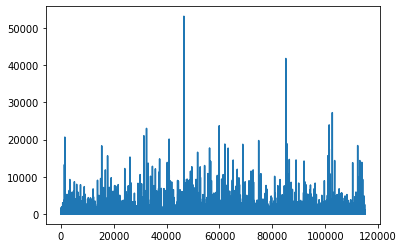

In [133]:
plt.plot(df_train['like_cnt'])

In [143]:
genre_gn_all = pd.read_json("melon_data/genre_gn_all.json",typ='series')

In [144]:
df_genre = pd.DataFrame(genre_gn_all, columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})

In [148]:
df_genre

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
...,...,...
249,GN2900,뮤지컬
250,GN2901,세부장르전체
251,GN2902,국내뮤지컬
252,GN2903,국외뮤지컬


In [154]:
df_val.sort_values('like_cnt', ascending=False)

,tags,id,plylst_title,songs,like_cnt,updt_date
2565,"[매장음악, 휴식, 팝, 까페]",111688,,"[265611, 395770, 409503, 398223, 388695, 42551...",32695,2020-03-19 11:49:34.000
22108,[],46571,,"[221629, 297450, 587323, 554774, 266241, 13513...",18192,2018-09-22 22:41:08.000
9302,[],14226,,"[338111, 287095, 282689, 61208, 214714, 355947...",16075,2020-04-12 19:28:07.000
17892,"[기분좋은, 상큼한, 상쾌한, 해피]",78863,,"[13081, 467385, 142360, 147298, 194288, 327898...",14057,2020-02-28 09:56:52.000
19009,[팝],113046,,"[145523, 600300, 323625, 684498, 554106, 24929...",13675,2018-06-03 23:20:02.000
...,...,...,...,...,...,...
14468,[],27246,,"[362966, 367963, 704707, 297411]",0,2017-12-27 20:45:46.000
21264,[],117144,옥화의 추천곡,[],0,2017-09-14 08:50:13.000
16195,[키즈클래식],93200,,"[178300, 482912, 387052, 363488, 262401, 21350...",0,2020-02-14 16:59:57.000
16193,[],107216,,"[95333, 649715, 450901, 211158, 434125, 106756...",0,2017-09-13 11:57:56.000


In [190]:
df_test_sorted = df_test.sort_values('like_cnt', ascending=False)

In [156]:
# df_test의 songs 개수 기준으로 내림차순 정렬하고 / 각각 song이 몇개인지 나타내보기

In [238]:
df_test_sorted.insert(3,'# of songs',0)

In [231]:
df_test_sorted.drop(' # of songs',axis=1,inplace=True)

In [232]:
df_test_sorted = df_test_sorted.reset_index(drop=True)

In [234]:
df_test_sorted.drop('# of songs',axis=1,inplace=True)

In [243]:
for i in range(0,10740):
    df_test_sorted['# of songs'][i] = len(df_test_sorted['songs'][i])

/Users/joyoungmin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [244]:
df_test_sorted # Wow

,tags,id,plylst_title,# of songs,songs,like_cnt,updt_date
0,"[감성힙합, 랩, 한국힙합]",139284,,47,"[338851, 261632, 688022, 567811, 607465, 36683...",36075,2020-04-20 13:43:03.000
1,[],135548,,21,"[514673, 298579, 573694, 479422, 169894, 33485...",32270,2011-10-04 00:56:54.000
2,"[봄바람, 드라이브, 기분전환, 설렘]",131039,,64,"[84356, 584840, 674886, 522350, 659573, 13030,...",9748,2020-03-01 06:00:26.000
3,[],91321,,40,"[237407, 267044, 658806, 686323, 535483, 16649...",9410,2020-04-15 19:09:29.000
4,[],151650,,48,"[673869, 700562, 579003, 434871, 260287, 34879...",8999,2020-04-20 06:00:25.000
...,...,...,...,...,...,...,...
10735,[힙합],1780,,12,"[311834, 672876, 508131, 370044, 635021, 37461...",0,2013-05-27 12:21:33.000
10736,[],22687,,3,"[151978, 278872, 283632]",0,2016-11-03 21:35:11.000
10737,"[잔잔한, 감성, 밤, 겨울밤]",71122,,15,"[19533, 241136, 357489, 295250, 151183, 542554...",0,2018-02-20 08:04:45.000
10738,[],45424,,9,"[285023, 505515, 444796, 621092, 76538, 162762...",0,2015-08-19 16:59:38.000


In [255]:
df_test_sorted.sort_values('# of songs', ascending=False,inplace=True)

In [290]:
df_test_sorted = df_test_sorted.reset_index(drop=True)
df_test_sorted

,tags,id,plylst_title,# of songs,songs,like_cnt,updt_date
0,[],9697,,100,"[215899, 261767, 289349, 127169, 573289, 38429...",141,2018-12-27 19:25:07.000
1,[],132442,,100,"[422945, 659573, 611185, 400380, 256854, 26470...",4,2020-04-18 13:09:53.000
2,[],125715,,100,"[365188, 520134, 529724, 241529, 32229, 586768...",24,2014-09-23 12:17:18.000
3,[추억],46475,,100,"[254435, 473716, 74624, 448738, 319861, 671533...",56,2015-05-04 19:41:30.000
4,"[힙합, 외국힙합, 불금]",20660,,100,"[689603, 182469, 680495, 76256, 159615, 471442...",56,2018-12-07 14:15:00.000
...,...,...,...,...,...,...,...
10735,[],17196,멜로디가 너무 좋은 아련한 발라드,0,[],3,2015-01-18 05:33:23.000
10736,[],117523,댄싱9 생방2회,0,[],14,2013-09-09 11:18:01.000
10737,[설렘],10049,겨울과 크리스마스 느낌이 물씬 나는 이 노래를 들어보자!,0,[],14,2015-11-26 01:46:31.000
10738,[새벽],23025,술마실때 듣고 싶은 음악,0,[],6,2015-01-11 20:26:01.000


In [291]:
for i in range(0,101):
    print(i,end=' ')
    print(df_test_sorted[df_test_sorted['# of songs']==i].shape[0])
    i+=1

0 2043
1 9
2 52
3 73
4 143
5 361
6 325
7 382
8 357
9 578
10 766
11 326
12 302
13 319
14 335
15 415
16 225
17 204
18 187
19 171
20 160
21 132
22 155
23 129
24 131
25 174
26 73
27 84
28 88
29 80
30 73
31 76
32 65
33 48
34 47
35 72
36 87
37 57
38 64
39 58
40 53
41 40
42 41
43 40
44 40
45 31
46 36
47 41
48 38
49 48
50 62
51 34
52 31
53 22
54 16
55 24
56 15
57 21
58 17
59 18
60 22
61 17
62 12
63 17
64 14
65 13
66 8
67 12
68 20
69 6
70 12
71 11
72 9
73 16
74 11
75 11
76 5
77 5
78 6
79 7
80 7
81 12
82 4
83 7
84 10
85 7
86 6
87 6
88 9
89 4
90 8
91 2
92 5
93 8
94 6
95 6
96 8
97 11
98 8
99 13
100 265


In [279]:
df_test_sorted[df_test_sorted['# of songs']==].shape[0]

52

In [ ]:
## 오늘(10/18)은 여기까지하고 데이터를 어떠한 모델 만들어서, 어떠한 기준으로 처리할지 생각해보자
## 이 노트북을 깃허브에 올리는 법도 찾아보자